# K-Means using sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1,2], [1.5, 1.8], [5,8], [8, 8], [1, 0.6], [9, 11]])

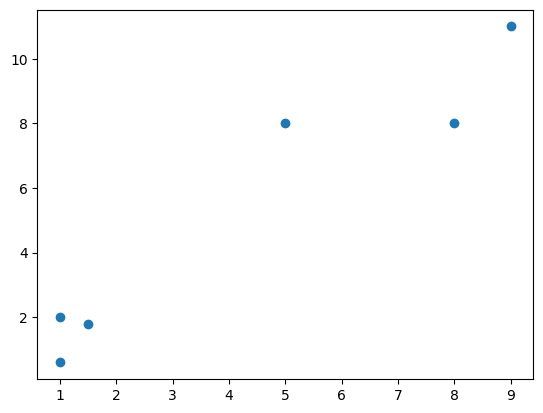

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
k_means = KMeans(n_clusters=2)

In [8]:
k_means.fit(X)

c:\Users\divya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [9]:
k_means.labels_

array([1, 1, 0, 0, 1, 0])

In [10]:
k_means.cluster_centers_

array([[7.33333333, 9.        ],
       [1.16666667, 1.46666667]])

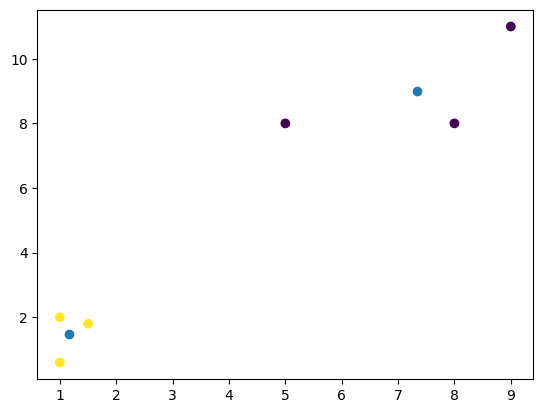

In [11]:
plt.scatter(X[:, 0], X[:, 1], c = k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1])
plt.show()

# Self implementation of K-Means

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

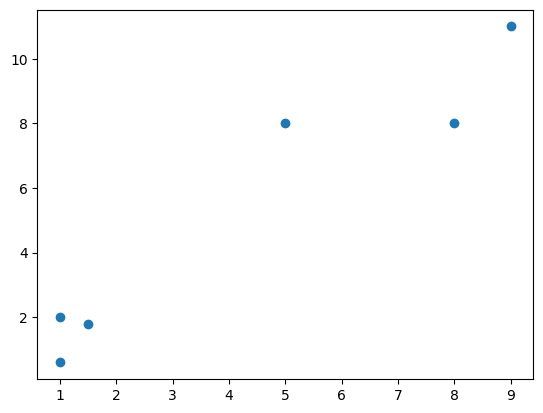

In [15]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# Class of K-Means 

In [21]:
class K_Means:
    def __init__(self, k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter

    def fit(self, data):
        self.means = []
        # randomly intitialize thne means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            # assign the data points to the cluster that they belong to create empty clusters
            clusters = []
            for j in range(self.k):
                clusters.append([])
            for point in data:
                # find distance to all the mean values
                distances = [((point - m)**2).sum() for m in self.means]
                # find the mean distance
                minDistance = min(distances)
                # find the mean for which we got the minimum distance --> 1
                l = distances.index(minDistance)
                # add this point to cluster 1
                clusters[l].append(point)

            # calculate the new mean values
            change  = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis = 0)
                if not np.array_equal(self.means[j], new_mean):
                    change  = True
                self.means[j] = new_mean
            if not change:
                break
    def predict(self, test_data):
        predictions = []
        for point in test_data:
            # find distance to all the mean values
            distances = [((point - m)**2).sum() for m in self.means]
            # find the mean distance
            minDistance = min(distances)
            # find the mean for which we got the minimum ditance --> 1
            l = distances.index(minDistance)
            # add this point to cluster 1
            predictions.append(l)
        return predictions

In [22]:
kmeans = K_Means(2, 10)

constructor


In [23]:
kmeans.fit(X)

In [24]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1]

In [25]:
kmeans.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]